In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # For ready made datasets

In [2]:
# x & y are inputs and labels..We're extracting them from make_moons dataset
x,y = make_moons(200, noise = 0.20) # 200 is datapoints, noise is better to introduce some randomness.

In [3]:
x

array([[ 0.45774375,  0.97024684],
       [-0.9606112 ,  0.3288529 ],
       [ 0.15433552,  1.1218648 ],
       [ 0.38003846, -0.27318257],
       [ 1.9279302 ,  0.24570397],
       [-0.44403747,  0.27567909],
       [-0.75252288,  0.75205626],
       [ 0.4681545 , -0.51589808],
       [ 0.9314859 , -0.32547738],
       [ 1.38537808, -0.42702968],
       [ 1.32101886, -0.17466748],
       [-0.97231012,  0.18119818],
       [-1.02980963,  0.53655476],
       [ 1.38429701, -0.16458394],
       [ 0.91096813,  0.44744206],
       [ 0.56373837, -0.16221138],
       [ 0.40247333,  1.11883467],
       [ 2.15772044,  0.17028649],
       [ 1.86613153, -0.18618351],
       [-0.31966409,  0.80377918],
       [-1.18929744,  0.26160488],
       [ 0.89172689, -0.34221516],
       [ 1.87515814,  0.62095834],
       [-1.10541417,  0.21322016],
       [-1.03724862,  0.30657183],
       [-0.13055274,  1.08336005],
       [ 0.6362095 ,  0.99508428],
       [-1.38539894,  0.26270489],
       [ 1.80221815,

In [4]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1])

Here x is an array of co-ordinates of points, y is our output labelm

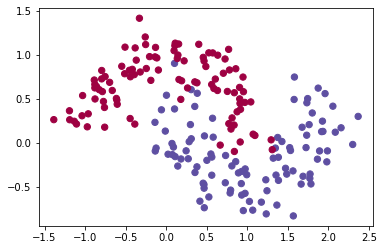

In [5]:
# scatter plot. s is thickness, c is our y with 2 diff values producing 2 colours
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show()

#### Non- Linearity

Moon like figures red and blue with crescent resemblence. Hence, make_moons dataset. We cannot replce this with a straight line. We can use SVM which has kernel function that splits into splines, but with less accuracy.

Neural networks are good for this kind of data where they introduce MLP ( Multi Layer Perceptron ) models with high accuracy. They can seperate the non-linearly separable datapoints.


Let us now convert datapoints into torch.FloarTensor as the original data is already in floating values

In [6]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y) #int64

In [7]:
x

tensor([[ 0.4577,  0.9702],
        [-0.9606,  0.3289],
        [ 0.1543,  1.1219],
        [ 0.3800, -0.2732],
        [ 1.9279,  0.2457],
        [-0.4440,  0.2757],
        [-0.7525,  0.7521],
        [ 0.4682, -0.5159],
        [ 0.9315, -0.3255],
        [ 1.3854, -0.4270],
        [ 1.3210, -0.1747],
        [-0.9723,  0.1812],
        [-1.0298,  0.5366],
        [ 1.3843, -0.1646],
        [ 0.9110,  0.4474],
        [ 0.5637, -0.1622],
        [ 0.4025,  1.1188],
        [ 2.1577,  0.1703],
        [ 1.8661, -0.1862],
        [-0.3197,  0.8038],
        [-1.1893,  0.2616],
        [ 0.8917, -0.3422],
        [ 1.8752,  0.6210],
        [-1.1054,  0.2132],
        [-1.0372,  0.3066],
        [-0.1306,  1.0834],
        [ 0.6362,  0.9951],
        [-1.3854,  0.2627],
        [ 1.8022,  0.3385],
        [ 2.3010, -0.0192],
        [ 0.8753,  0.3519],
        [ 0.9175,  0.3801],
        [-0.6641,  0.5942],
        [ 1.3552, -0.3668],
        [-0.7860,  0.5814],
        [ 2.3683,  0

In [8]:
y

tensor([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1])

In [9]:
print("Sample features are :{},\n Sample labels are :{}".format(x[:5], y[:5]))

Sample features are :tensor([[ 0.4577,  0.9702],
        [-0.9606,  0.3289],
        [ 0.1543,  1.1219],
        [ 0.3800, -0.2732],
        [ 1.9279,  0.2457]]),
 Sample labels are :tensor([0, 0, 0, 1, 1])


### Building a neural network

In [10]:
class FeedForward(nn.Module):
    
    """ Inherits from nn.Module to our class"""
    
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.input_layer = nn.Linear(input_neurons, hidden_neurons)
        self.output_layer = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        out = self.input_layer(x)
        out = F.relu(out)
        out = self.output_layer(out)
        return out

Our dataset x has two features, no two input neurons should be in the first layer. Let us choose 50 hidden_neurons as our output of first_layer. No of output_neurons in output_layer should match our original label size in dataset. So, 2 neurons in final layer.

In [11]:
network = FeedForward(input_neurons= 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr=0.02) # Normal SGD, not momentum..Can use that too, no problem with such a small network
# Since we have two output neurons, we cannot use BCE loss where output is binary. But, here we have to use cross entropy as we have two neurons.
# PyTorch will automatically apply softmax when called Cross Entropy Loss as they come hand in hand as a married couple
loss_function = torch.nn.CrossEntropyLoss()

For other frameworks like TensorFlow, Keras the computational graphs are static and all operations are done at once. But, for the Powerful PyTorch, we have the flexibility of a dynamic computational graph, which means it learns on-the-fly. So, we have to loop over for all epochs that we want to train the network upon.

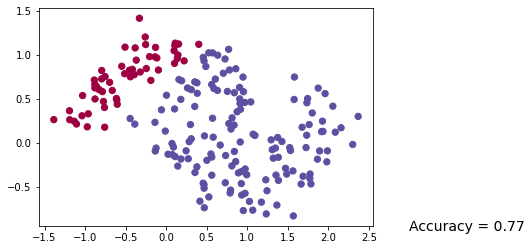

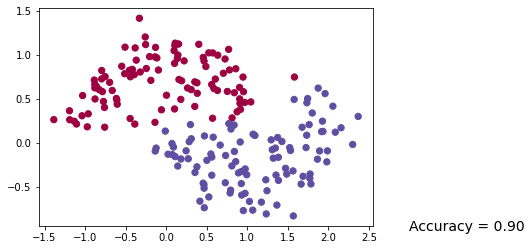

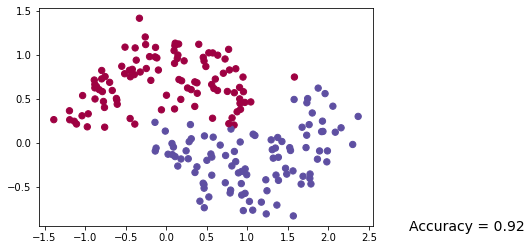

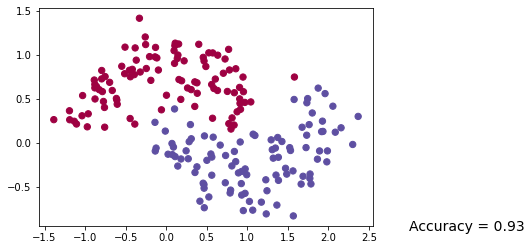

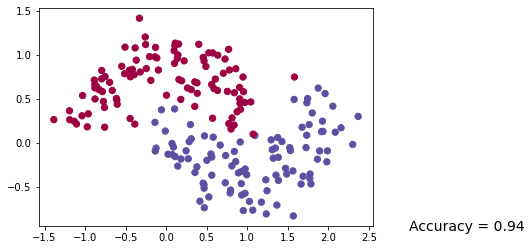

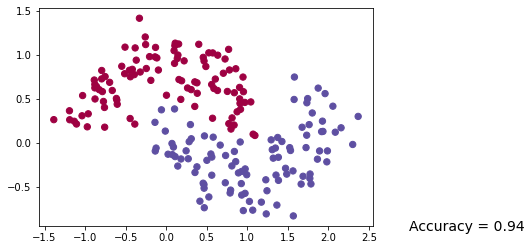

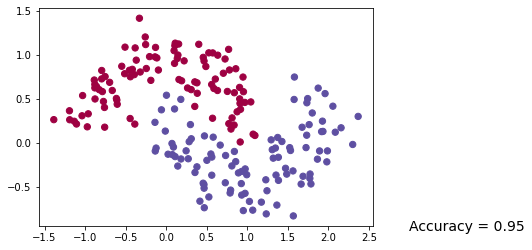

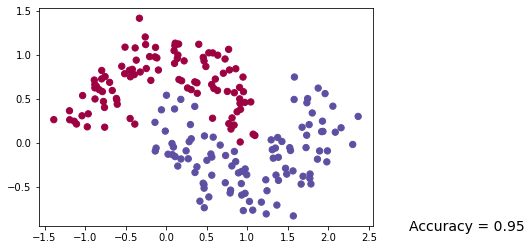

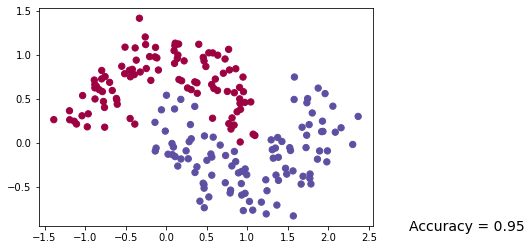

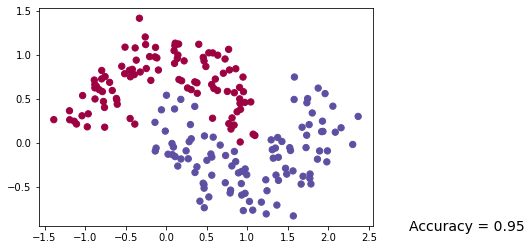

In [12]:
plt.ion() # sometimes, causes problems, hence plt.intercative mode on

epochs = 10000 # As per an experiment, this model needs 10k epochs to converge

for epoch in range(epochs):
    # Forward propogation
    output = network.forward(x)
    # Compute loss
    loss = loss_function(output, y)
    # Back propogate and compute gradients
    # Before that, we need to clear gradients to avoid accumulation
    optimizer.zero_grad()
    loss.backward()
    # Update weights
    optimizer.step()
    
    # We will plot learning for every 1000 epochs
    if epoch % 1000 == 0: # for every factor of 1000 without any remainder(basically for every 1000)
        # show the learning process until now
        # our outputs is an array of softmax activated values. So, we need maximum of them to consider as a prediction
        max_value, prediction = torch.max(output, 1) # Here 1 is the axis. Softmax values are distributed among columns. Check once to understand
        # prediction is just the index of that value which is ofcourse as the name suggests
        # convert tensors into ndarray as matplotlib accepts only numpy
        predicted_y = prediction.data.numpy()
        # also the label data to plot
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 40, c = predicted_y, cmap = plt.cm.Spectral)
        
        # Accuracy percentage is basically a boolean values summed & normalized to target_y.size
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14}) # location to plot text. {:.2f} gets values upto 2 decimals
        plt.pause(0.1) # just pause for small time until plot gets updated


plt.ioff() #plt.interactive mode should be off        
plt.show()